In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [3]:
file_path = "/content/innovize_final_ml.csv"
df = pd.read_csv(file_path)

num_cols = ['phy_fitness', 'gender', 'daily_avg_steps', 'daily_avg_calories']
cat_cols = ['diet_pref', 'act_level', 'career']

df[num_cols] = df[num_cols].fillna(df[num_cols].mean())
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

X = df.drop(columns=['is_healthy'])
y = df['is_healthy']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

svm_preds = svm_model.predict(X_test)
svm_acc = accuracy_score(y_test, svm_preds)
print(f"SVM Accuracy: {svm_acc:.4f}")

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

rf_preds = rf_model.predict(X_test)
rf_acc = accuracy_score(y_test, rf_preds)
print(f"Random Forest Accuracy: {rf_acc:.4f}")

X_plot = df[['phy_fitness', 'mindfulness']].values
y_plot = df['is_healthy'].values

svm_plot_model = SVC(kernel='linear')
svm_plot_model.fit(X_plot, y_plot)

SVM Accuracy: 0.9933
Random Forest Accuracy: 0.9692


SVC(kernel='linear')

In [5]:
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
    plt.xlabel('Physical Fitness')
    plt.ylabel('Mindfulness')
    plt.title('Decision Boundary - SVM')
    plt.legend(*scatter.legend_elements(), title="Health Status")
    plt.show()

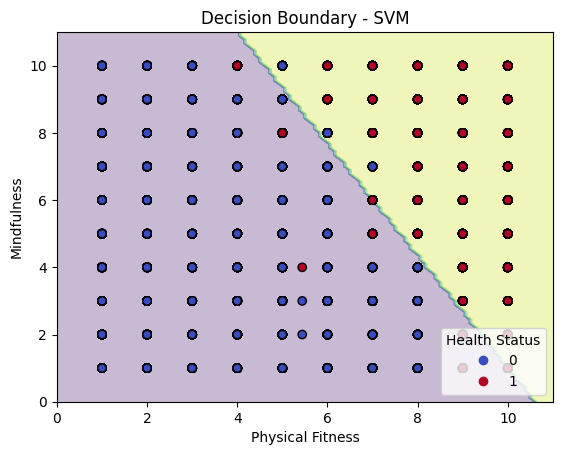

In [6]:
plot_decision_boundary(svm_plot_model, X_plot, y_plot)
